In [1]:
from pyforest import*

In [2]:
lazy_imports()

['import cv2',
 'import tqdm',
 'import fbprophet',
 'from sklearn.preprocessing import MinMaxScaler',
 'import lightgbm as lgb',
 'from sklearn.decomposition import PCA',
 'from sklearn.preprocessing import RobustScaler',
 'import statsmodels.api as sm',
 'import statistics',
 'import plotly.graph_objs as go',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.impute import SimpleImputer',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from sklearn.linear_model import ElasticNet',
 'import dash',
 'from sklearn.model_selection import StratifiedKFold',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from sklearn.preprocessing import LabelEncoder',
 'import awswrangler as wr',
 'import re',
 'import os',
 'from sklearn.cluster import KMeans',
 'import seaborn as sns',
 'import pydot',
 'import textblob',
 'import skimage',
 'import matplotlib.pyplot as plt',
 'import gensim',
 'from sklearn import metrics',
 'import torch',
 'import sys',
 'import panda

In [4]:
df = pd.read_csv('BankNote_Authentication .csv')

<IPython.core.display.Javascript object>

In [5]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
df.shape

(1372, 5)

In [8]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [9]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [10]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

## Visualizations
<br>
<br>

**Univariate Data Analysis**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/home/divakar/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of "Class" Attribute'}, xlabel='class', ylabel='Density'>

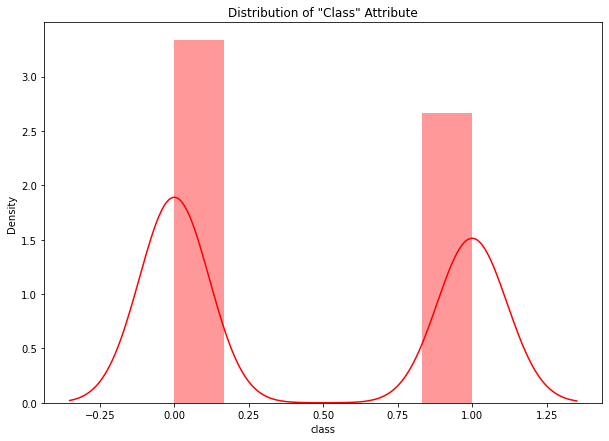

In [12]:
plt.figure(figsize=(10,7))
plt.title('Distribution of "Class" Attribute')

sns.distplot(df['class'],color='red')

**Multivariate Data Analysis**

/home/divakar/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'variance'}>,
        <AxesSubplot:title={'center':'skewness'}>,
        <AxesSubplot:title={'center':'curtosis'}>],
       [<AxesSubplot:title={'center':'entropy'}>,
        <AxesSubplot:title={'center':'class'}>, <AxesSubplot:>]],
      dtype=object)

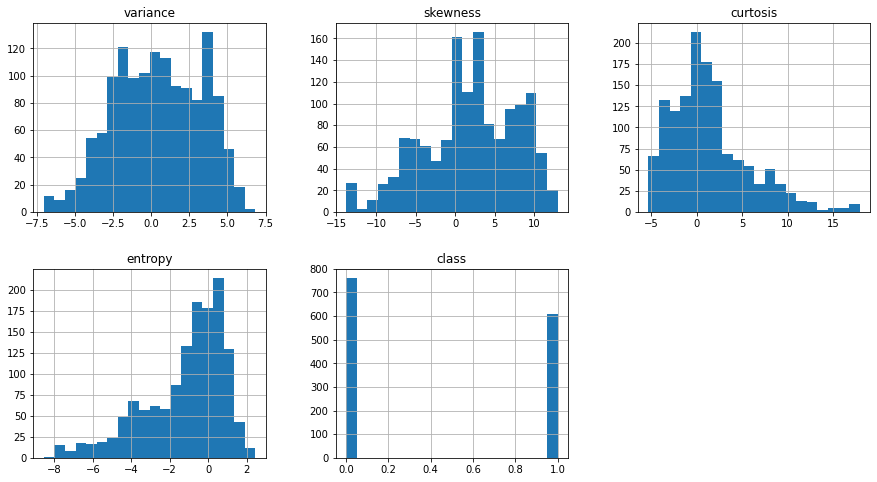

In [13]:
df.hist(bins=20, figsize=(15,8),layout=(2,3))

In [14]:
import warnings

warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

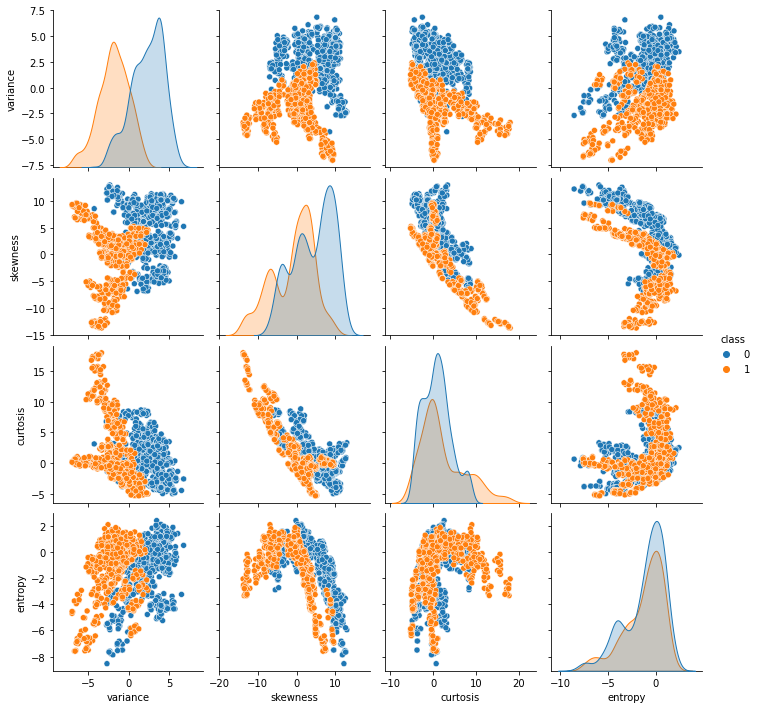

In [15]:
sns.pairplot(df, hue="class")

## Preparing Our Data To Build Our Mode

In [17]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [18]:
X = df.drop(['class'],axis=1) 
y = df['class']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## Scaling Our Data

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train

array([[-1.58438248,  0.1072115 , -0.14276339,  0.03334576],
       [-1.08829139, -2.53123321,  2.67783284, -0.35092979],
       [ 1.13672843, -0.15348755, -0.16820608,  0.86368769],
       ...,
       [-1.6900361 ,  0.72314447, -0.19588896, -2.05114485],
       [ 0.57766241,  0.02698182,  0.1851622 ,  0.52080477],
       [-0.9644631 ,  0.30908695, -0.49734797, -0.03521515]])

In [22]:
y_train.head()

1226    1
1085    1
148     0
1178    1
478     0
Name: class, dtype: int64

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

classifier=LogisticRegression(solver='liblinear',random_state=1)
classifier.fit(X_train,y_train)

accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("Accuracies:\n",accuracies)

y_test_pred=classifier.predict(X_test)


print("Mean Accuracy: ",accuracies.mean())

Accuracies:
 [0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]
Mean Accuracy:  0.9835863219349459


In [24]:
accuracy_score(y_test,y_test_pred)

0.9745454545454545

Confusion Matrix For Logistic Regression


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

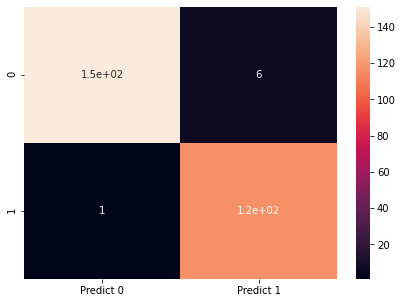

In [25]:
from sklearn import metrics

print("Confusion Matrix For Logistic Regression")
cm=metrics.confusion_matrix(y_test, y_test_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## Support Vector Machine

In [26]:
from sklearn.svm import SVC

svm_classifier=SVC(kernel='linear')
svm_classifier.fit(X_train,y_train)

svm_accuracies=cross_val_score(estimator=svm_classifier,X=X_train,y=y_train,cv=10)
print("Accuracies:\n",svm_accuracies)

Accuracies:
 [0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [27]:
svm_pred=svm_classifier.predict(X_test)

print("Mean Accuracy: ",svm_accuracies.mean())

Mean Accuracy:  0.9854045037531277


In [28]:
accuracy_score(y_test,svm_pred)

0.9818181818181818

Confusion Matrix For svm_pred


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

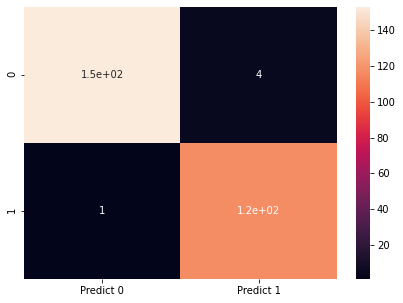

In [29]:
print("Confusion Matrix For svm_pred")
cm=metrics.confusion_matrix(y_test,svm_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

rdf_classifier=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)
rdf_classifier.fit(X_train,y_train)
rdf_accuracies=cross_val_score(estimator=rdf_classifier,X=X_test,y=y_test,cv=10)
 
print("Accuracies:\n",rdf_accuracies)
print("Mean Accuracy: ",rdf_accuracies.mean())

Accuracies:
 [0.96428571 1.         0.89285714 0.96428571 1.         0.96296296
 1.         0.96296296 1.         1.        ]
Mean Accuracy:  0.9747354497354497


In [31]:
rdf_pred=rdf_classifier.predict(X_test)

accuracy_score(y_test,rdf_pred)

0.9963636363636363

Confusion Matrix For Random Forest


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

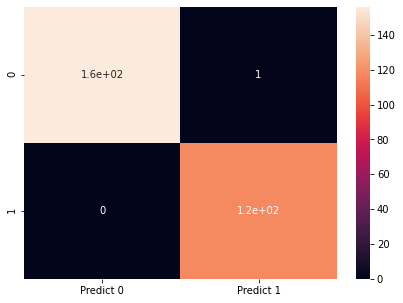

In [32]:
print("Confusion Matrix For Random Forest")
cm=metrics.confusion_matrix(y_test,rdf_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## KNeighborsClassifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {
    'leaf_size' : [2,5,7,9,11],
    'n_neighbors' : [2,5,7,9,11],
    'p' : [1,2]    
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [34]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [35]:
final_KNN_Model = grid.best_estimator_


In [36]:
KNN = KNeighborsClassifier(n_neighbors=2,p=1,leaf_size=2 )

In [37]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [38]:
KNN_predicted = KNN.predict(X_test)

accuracy_score(y_test,KNN_predicted)

1.0

Confusion Matrix For KNN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

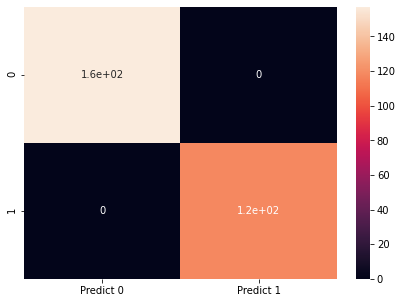

In [39]:
print("Confusion Matrix For KNN")
cm=metrics.confusion_matrix(y_test,KNN_predicted, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## Printing Each Algorithm and Accuracy Score

In [40]:
print("LogisticRegression:", accuracy_score(y_test,y_test_pred))
print("Support Vector Machine (using kernel=linear):", accuracy_score(y_test,svm_pred))
print("RandomForestClassifier:", accuracy_score(y_test,rdf_pred))
print("KNeighborsClassifier:", accuracy_score(y_test,KNN_predicted))

LogisticRegression: 0.9745454545454545
Support Vector Machine (using kernel=linear): 0.9818181818181818
RandomForestClassifier: 0.9963636363636363
KNeighborsClassifier: 1.0
